# Лабораторна 1

In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
data1 = pd.read_csv("1.txt") 
data2 = pd.read_csv("2.txt")
data = [data1, data2]
res = [data1, data2]

In [3]:
for i in range(len(data)):
    data[i]["$x^2$"] = data[i]["x"] * data[i]["x"]
    data[i]["$y^2$"] = data[i]["y"] * data[i]["y"]
    data[i]["xy"] = data[i]["x"] * data[i]["y"]
    res[i] = pd.DataFrame(data[i])
    res[i].loc['Total']= data[i].sum(numeric_only=True, axis=0)

In [4]:
res[0]

,x,y,$x^2$,$y^2$,xy
0,71,26,5041,676,1846
1,69,26,4761,676,1794
2,71,32,5041,1024,2272
3,80,32,6400,1024,2560
4,75,30,5625,900,2250
5,74,34,5476,1156,2516
6,84,42,7056,1764,3528
7,72,36,5184,1296,2592
8,76,9,5776,81,684
9,60,6,3600,36,360


In [5]:
res[1]

,x,y,$x^2$,$y^2$,xy
0,0.44,0.90,0.1936,0.8100,0.3960
1,0.46,0.86,0.2116,0.7396,0.3956
2,0.48,0.66,0.2304,0.4356,0.3168
3,0.50,0.56,0.2500,0.3136,0.2800
4,0.52,0.47,0.2704,0.2209,0.2444
5,0.54,0.43,0.2916,0.1849,0.2322
6,0.56,0.39,0.3136,0.1521,0.2184
7,0.58,0.35,0.3364,0.1225,0.2030
8,0.60,0.27,0.3600,0.0729,0.1620
9,0.62,0.25,0.3844,0.0625,0.1550


In [8]:
table1 = pd.DataFrame(columns=["x", "y", "$x^2$", "$y^2$", "xy"])
table1.loc["Вибірка 1"] = res[0].loc["Total"]
table1.loc["Вибірка 2"] = res[0].loc["Total"]
print("Таблиця 1.3л")
table1

Таблиця 1.3л


,x,y,$x^2$,$y^2$,xy
Вибірка 1,1375,334,100255,11406,23823
Вибірка 2,1375,334,100255,11406,23823


In [9]:
n = 10
table2 = pd.DataFrame(columns=["$\overline{x}$", "$\overline{y}$", "S(x)", "S(y)", "R", "a", "b", "$a_1$", "$b_1$"])
for i in range(len(data)):
    x_mean = data[i]["x"].mean()
    y_mean = data[i]["y"].mean()
    S_x = math.sqrt(((data[i]["x"] - x_mean) ** 2).sum() / (n - 1))
    S_y = math.sqrt(((data[i]["y"] - y_mean) ** 2).sum() / (n - 1))
    R = ((data[i]["x"] * data[i]["y"]).sum() - n * x_mean * y_mean) / ((n -1) * S_x * S_y)
    a = R * S_y / S_x
    b = y_mean - a * x_mean
    a1 = R * S_x / S_y
    b1 = x_mean - a1 * y_mean
    table2.loc["Вибірка " + str(i + 1)] = [x_mean, y_mean, S_x, S_y, R, a, b, a1, b1]

In [10]:
print("Таблиця 1.4")
table2

Таблиця 1.4


,$\overline{x}$,$\overline{y}$,S(x),S(y),R,a,b,$a_1$,$b_1$
Вибірка 1,72.368421,17.578947,9.119095,24.798368,5.454565,14.833085,-1055.868019,2.005805,37.108475
Вибірка 2,0.530000,0.514000,0.060553,0.229163,-0.967263,-3.660606,2.454121,-0.255586,0.661371


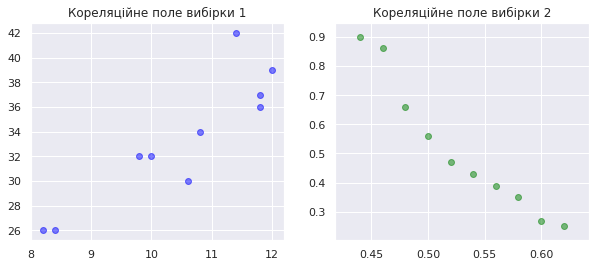

In [102]:
colors = ['blue', 'green']
_, axs = plt.subplots(1, 2, figsize=(10, 4))
for i in range(len(data)):
    x = data[i]["x"]
    y = data[i]["y"]
    axs[i].title.set_text('Кореляційне поле вибірки ' + str(i + 1))
    axs[i].scatter(x, y, alpha=0.5, color = colors[i])

In [118]:
x = data[1]["x"]
print(x)
np.arange(x.min(), x.max() + 0.1, 0.1)

0    0.44
1    0.46
2    0.48
3    0.50
4    0.52
5    0.54
6    0.56
7    0.58
8    0.60
9    0.62
Name: x, dtype: float64


array([0.44, 0.54, 0.64])

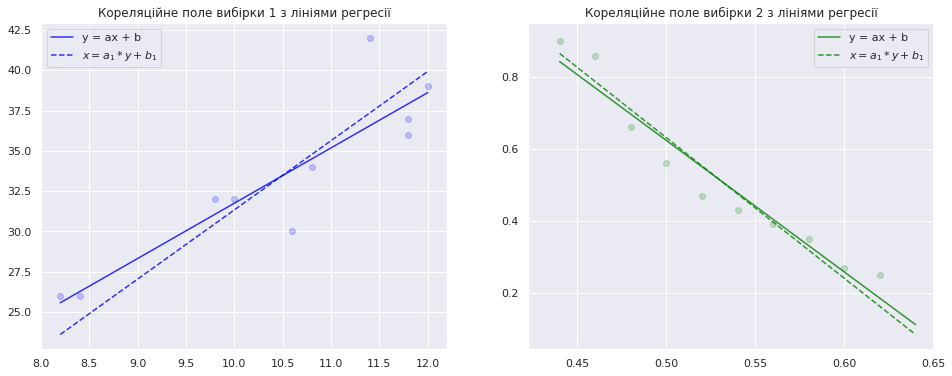

In [133]:
colors = ['blue', 'green']
_, axs = plt.subplots(1, 2, figsize=(16, 6))
for i in range(len(data)):
    x = data[i]["x"]
    y = data[i]["y"]
    axs[i].title.set_text('Кореляційне поле вибірки ' + str(i + 1) + " з лініями регресії")
    axs[i].scatter(x, y, alpha=0.2, color = colors[i], label = "")
    a = table2.iloc[i]["a"]
    b = table2.iloc[i]["b"]
    x = np.arange(x.min(), x.max() + 0.1, 0.1)
    axs[i].plot(x, a * x + b, alpha=0.8, color = colors[i], label = "y = ax + b")
    a1 = table2.iloc[i]["$a_1$"]
    b1 = table2.iloc[i]["$b_1$"]
    axs[i].plot(x, (x - b1) / a1, '--', alpha=0.8, color = colors[i], label = "$x = a_1 * y + b_1$")
    axs[i].legend()

# Лабораторна 2

In [140]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
patients = pd.read_csv("2_patients.txt")
patients["a0"] = [1] * len(patients)
coef = pd.read_csv("2_coef.txt")
patients

,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a0
0,2,2,3,13,0.35,19,1,1,1,2,1
1,2,4,4,29,0.98,22,2,1,1,1,1
2,0,1,1,36,0.12,12,1,2,1,1,1
3,3,2,3,5,0.35,23,2,1,2,2,1
4,3,6,4,26,0.78,19,1,1,1,2,1


In [141]:
coef

,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a0
0,1.417,0.244,-1.310,-2.039,1.070,1.65,1.667,-2.324,-0.918,1.443,4.609
1,0.095,0.283,0.566,1.766,-0.532,0.29,-0.061,1.254,-0.136,-0.753,-23.565


In [157]:
n = 10
res1 = patients * coef.iloc[0]
res1["sum"] = res1.sum(axis=1) / n
res1

,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a0,sum
0,2.834,0.488,-3.93,-26.507,0.3745,31.35,1.667,-2.324,-0.918,2.886,4.609,1.05295
1,2.834,0.976,-5.24,-59.131,1.0486,36.30,3.334,-2.324,-0.918,1.443,4.609,-1.70684
2,0.000,0.244,-1.31,-73.404,0.1284,19.80,1.667,-4.648,-0.918,1.443,4.609,-5.23886
3,4.251,0.488,-3.93,-10.195,0.3745,37.95,3.334,-2.324,-1.836,2.886,4.609,3.56075
4,4.251,1.464,-5.24,-53.014,0.8346,31.35,1.667,-2.324,-0.918,2.886,4.609,-1.44344


In [158]:
n = 10
res2 = patients * coef.iloc[1]
res2["sum"] = res2.sum(axis=1) / n
res2

,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a0,sum
0,0.190,0.566,1.698,22.958,-0.18620,5.51,-0.061,1.254,-0.136,-1.506,-23.565,0.672180
1,0.190,1.132,2.264,51.214,-0.52136,6.38,-0.122,1.254,-0.136,-0.753,-23.565,3.733664
2,0.000,0.283,0.566,63.576,-0.06384,3.48,-0.061,2.508,-0.136,-0.753,-23.565,4.583416
3,0.285,0.566,1.698,8.830,-0.18620,6.67,-0.122,1.254,-0.272,-1.506,-23.565,-0.634820
4,0.285,1.698,2.264,45.916,-0.41496,5.51,-0.061,1.254,-0.136,-1.506,-23.565,3.124404


In [163]:
res = pd.DataFrame(columns=["Номер пацієнта", "$F_1(x)$", "$F_2(x)$"])
res["Номер пацієнта"] = np.arange(1, len(patients) + 1)
res["$F_1(x)$"] = res1["sum"]
res["$F_2(x)$"] = res2["sum"]
res["Ступень тяжкості когнітивних порушень"] = [2, 2, 1, 3, 2]
res

,Номер пацієнта,$F_1(x)$,$F_2(x)$,Ступень тяжкості когнітивних порушень
0,1,1.05295,0.672180,2
1,2,-1.70684,3.733664,2
2,3,-5.23886,4.583416,1
3,4,3.56075,-0.634820,3
4,5,-1.44344,3.124404,2


# Математичні статистика

In [1]:
sample = [10,4,7,7,3,1,6,8,3,7,4,5,10,3,10,7,6,7,1,7,0,4,7,3,10,9,6,10,9,8,1,7,6]

In [3]:
sorted(sample)

[0,
 1,
 1,
 1,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 5,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 8,
 8,
 9,
 9,
 10,
 10,
 10,
 10,
 10]

In [4]:
def CountFrequency(my_list): 
  
    # Creating an empty dictionary  
    freq = {} 
    for item in my_list: 
        if (item in freq): 
            freq[item] += 1
        else: 
            freq[item] = 1
  
    for key, value in freq.items(): 
        print ("% d : % d"%(key, value)) 

In [6]:
CountFrequency(sorted(sample))

 0 :  1
 1 :  3
 3 :  4
 4 :  3
 5 :  1
 6 :  4
 7 :  8
 8 :  2
 9 :  2
 10 :  5


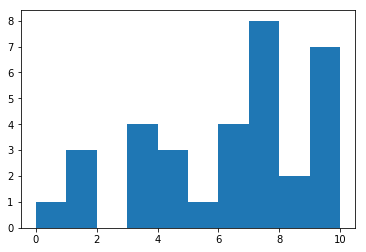

In [9]:
import matplotlib.pyplot as plt
plt.hist(sample, bins=10)
plt.show()

In [16]:
import numpy as np
print("Sum: ", np.sum(sample))
print("Mean: ", np.mean(sample))

Sum:  196
Mean:  5.9393939393939394


In [17]:
196 / 5.9393939393939394

33.0

In [18]:
sum([((x) ** 2) for x in sample])

1438

In [20]:
(1438 / 33 - np.mean(sample) ** 2) ** 0.5

2.880860497915184

In [22]:
mean = np.mean(sample)
variance = sum([((x - mean) ** 2) for x in sample]) / len(sample) 
res = variance ** 0.5
res

2.8808604979151835

In [23]:
res / mean

0.48504283893469924